1.	Скачать или импортировать в notebook датасет Wine, после чего отобразить первые и последние 5 строк датасета

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import svm
import plotly.figure_factory as ff
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, roc_curve
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/sample_data/wine.data")
df.columns=["index", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",  "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",  "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline "]
df

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
sliced_df = df.head(5)
sliced_df = sliced_df.append(df.tail(5))
print (sliced_df)

     index  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    13.20        1.78  2.14               11.2        100   
1        1    13.16        2.36  2.67               18.6        101   
2        1    14.37        1.95  2.50               16.8        113   
3        1    13.24        2.59  2.87               21.0        118   
4        1    14.20        1.76  2.45               15.2        112   
172      3    13.71        5.65  2.45               20.5         95   
173      3    13.40        3.91  2.48               23.0        102   
174      3    13.27        4.28  2.26               20.0        120   
175      3    13.17        2.59  2.37               20.0        120   
176      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.65        2.76                  0.26             1.28   
1             2.80        3.24                  0.30             2.81   

2.	Необходимо рассмотреть данные и провести анализ( количество семплов, типы данных в ячейках, распределение, корреляция…)

In [ ]:
df.dtypes

index                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [ ]:
df.shape

(177, 14)

In [ ]:
df.describe()

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


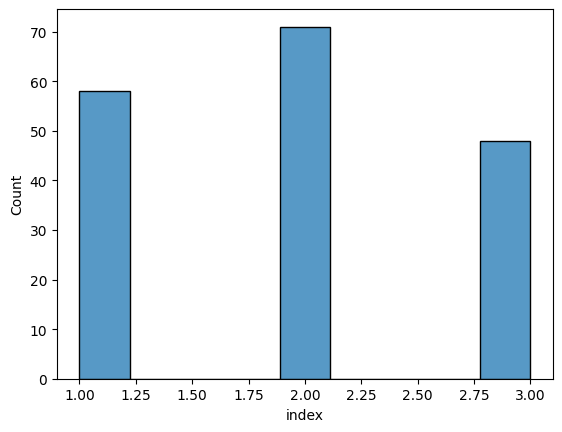

In [ ]:
sns.histplot(df["index"])
plt.show()

In [ ]:
print(df.corr())

                                 index   Alcohol  Malic acid       Ash  \
index                         1.000000 -0.321238    0.436127 -0.048260   
Alcohol                      -0.321238  1.000000    0.099963  0.210964   
Malic acid                    0.436127  0.099963    1.000000  0.164955   
Ash                          -0.048260  0.210964    0.164955  1.000000   
Alcalinity of ash             0.513963 -0.303350    0.286148  0.446698   
Magnesium                    -0.198944  0.258742   -0.049049  0.287107   
Total phenols                -0.717933  0.284543   -0.333512  0.128176   
Flavanoids                   -0.846485  0.230133   -0.409324  0.114084   
Nonflavanoid phenols          0.487215 -0.151445    0.291501  0.187354   
Proanthocyanins              -0.494887  0.127561   -0.217975  0.008082   
Color intensity               0.268562  0.547883    0.250053  0.258643   
Hue                          -0.617690 -0.075375   -0.560854 -0.075181   
OD280/OD315 of diluted wines -0.786428

3. Произвести визуализации пункта 2, а также провести анализ с помощью библиотек matplotlib,seaborn

<Axes: xlabel='Alcohol', ylabel='Hue'>

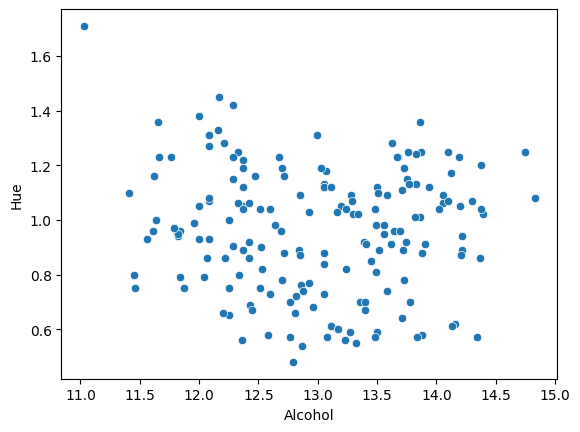

In [ ]:
sns.scatterplot(df, x="Alcohol", y="Hue")

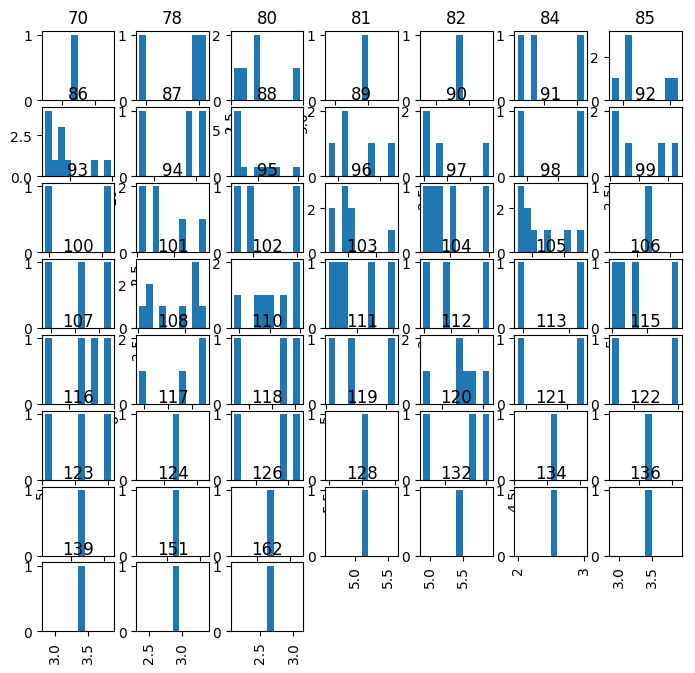

In [ ]:
df.hist("Color intensity", by= "Magnesium", figsize=(8,8))
plt.subplots_adjust(hspace=0.1)
plt.show()

<Axes: xlabel='Alcalinity of ash', ylabel='Flavanoids'>

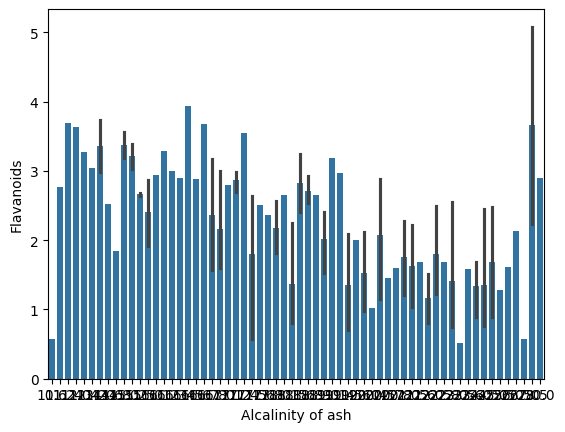

In [ ]:
sns.barplot(df, x= "Alcalinity of ash", y= "Flavanoids")

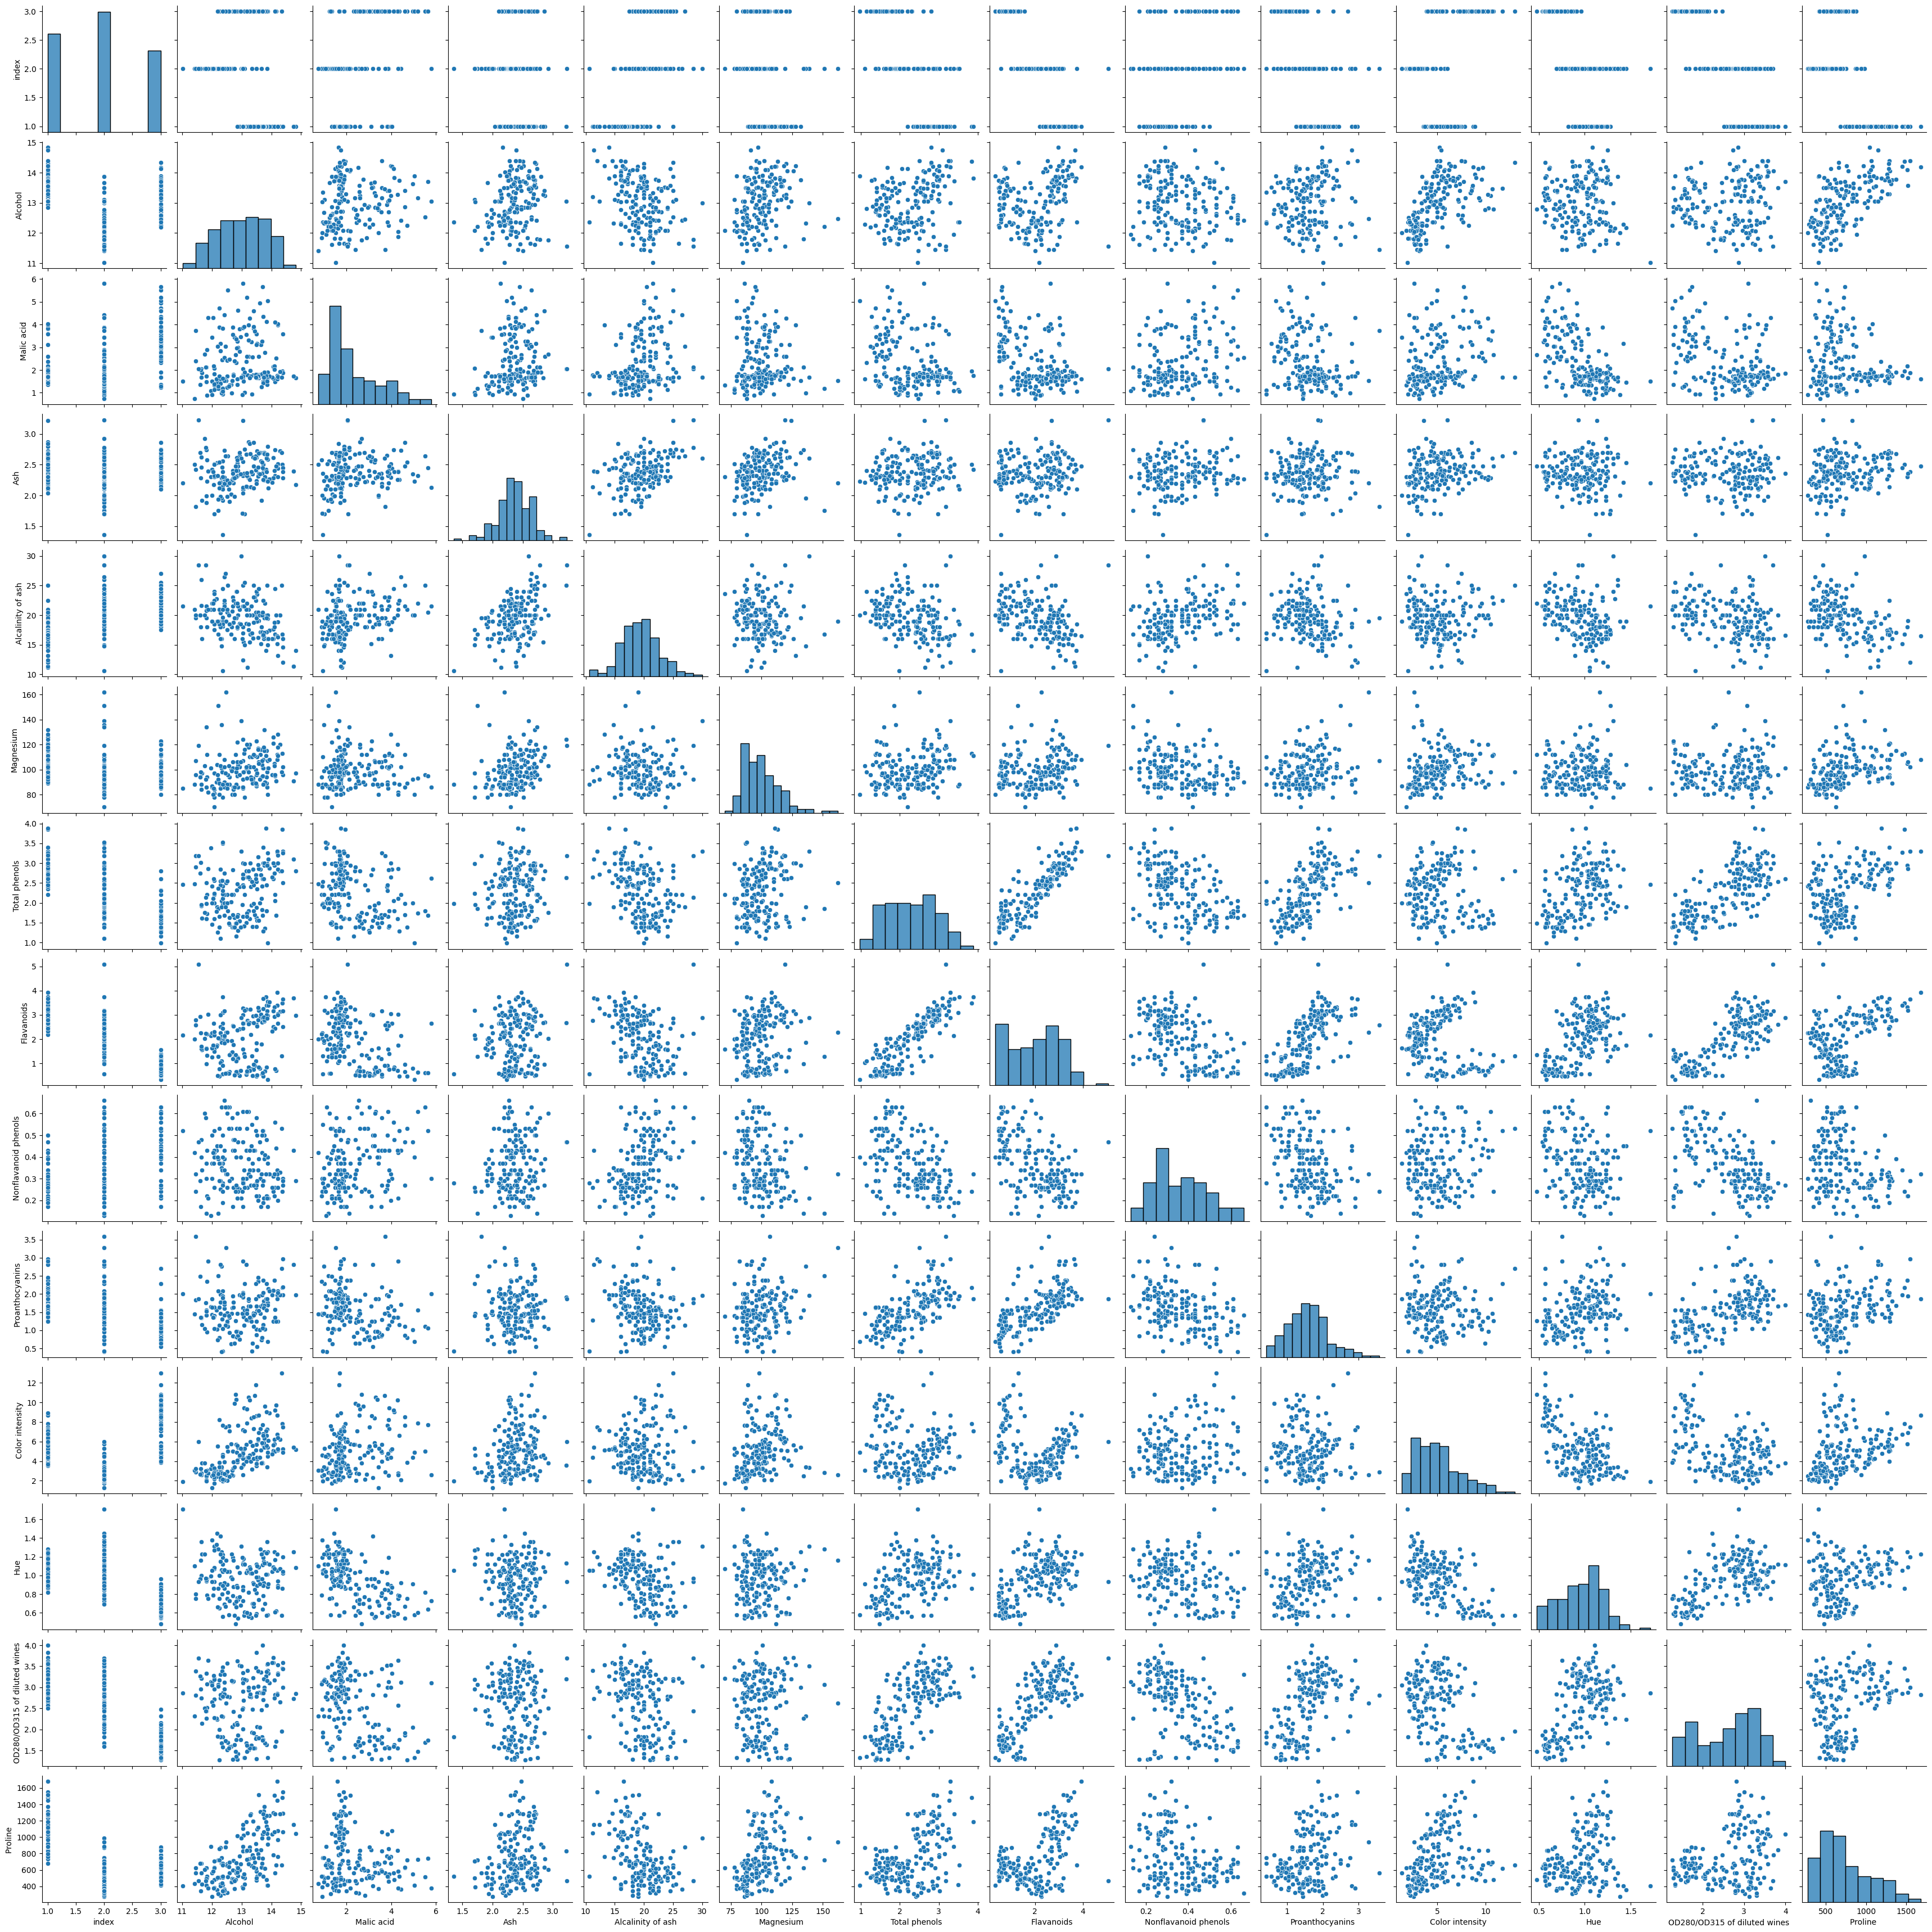

In [ ]:
cols=["Magnesium", "Hue", "Ash", "Total phenols"]
sns.pairplot(df)

<Axes: >

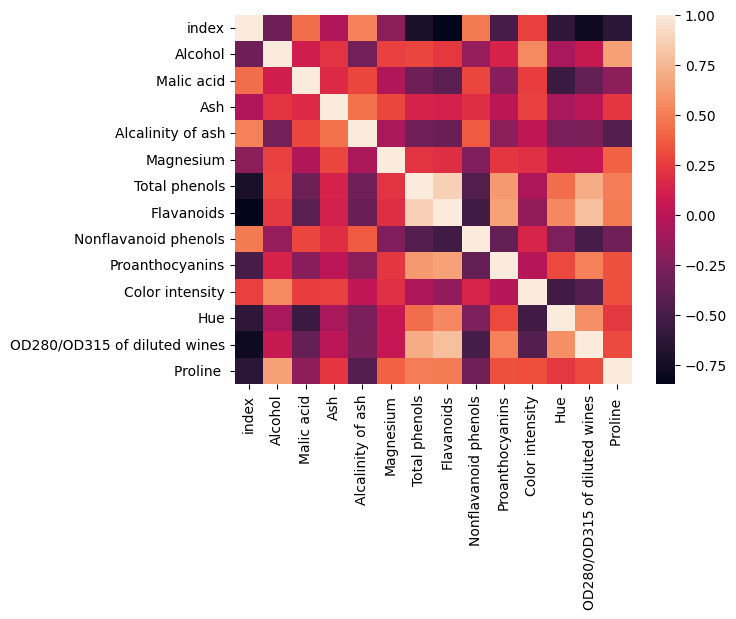

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

In [ ]:
corr=df.corr().sort_values(["index"])

In [ ]:
max_corr_1 = corr.index[-2]
max_corr_2 = corr.index[-3]
min_corr_1 = corr.index[0]
min_corr_2 = corr.index[1]
print (max_corr_1, max_corr_2)
print (min_corr_1, min_corr_2)

Alcalinity of ash Nonflavanoid phenols
Flavanoids OD280/OD315 of diluted wines


In [ ]:
df_corr_max=df[["index", max_corr_1, max_corr_2]]
df_corr_min=df[["index", min_corr_1, min_corr_2]]
print (df_corr_max, df_corr_min)

     index  Alcalinity of ash  Nonflavanoid phenols
0        1               11.2                  0.26
1        1               18.6                  0.30
2        1               16.8                  0.24
3        1               21.0                  0.39
4        1               15.2                  0.34
..     ...                ...                   ...
172      3               20.5                  0.52
173      3               23.0                  0.43
174      3               20.0                  0.43
175      3               20.0                  0.53
176      3               24.5                  0.56

[177 rows x 3 columns]      index  Flavanoids  OD280/OD315 of diluted wines
0        1        2.76                          3.40
1        1        3.24                          3.17
2        1        3.49                          3.45
3        1        2.69                          2.93
4        1        3.39                          2.85
..     ...         ...            

4.	Разбить данные на test и train. Предварительно убрав колонки с таргетом

In [ ]:
count_NaN = df.isna().sum()
count_NaN

index                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

5.	Обучить decision tree на 2х самых коррелирующих признаках и не коррелирующих признаках, используя gini. Посмотреть метрики(f1score,accuracy,precision,recall), сделать выводы, построить ConfusionMatrix

In [ ]:
target = "index"
X_max=df_corr_max.drop(columns=[target])
X_min=df_corr_min.drop(columns=[target])
Y=df[target]
Y=pd.get_dummies(Y, prefix="index")
trainX_max, testX_max, trainY_max, testY_max = train_test_split(X_max, Y, test_size=0.2, random_state=42)
trainX_min, testX_min, trainY_min, testY_min = train_test_split(X_min, Y, test_size=0.2, random_state=42)

dt_max= tree.DecisionTreeClassifier(criterion="gini")
dt_min= tree.DecisionTreeClassifier(criterion="gini")

dt_max=dt_max.fit(trainX_max, trainY_max)
dt_min=dt_min.fit(trainX_min, trainY_min)

y_max_predicted=dt_max.predict(testX_max)
y_min_predicted=dt_min.predict(testX_min)

acc_max=accuracy_score(testY_max, y_max_predicted)
acc_min= accuracy_score(testY_min, y_min_predicted)
report_max=classification_report(testY_max, dt_max.predict(testX_max), target_names= ["1", "2" , "3"])
report_min=classification_report(testY_min, dt_min.predict(testX_min), target_names= ["1", "2" , "3"])
print (acc_max, report_max)
print (acc_min, report_min)


0.3888888888888889               precision    recall  f1-score   support

           1       0.67      0.43      0.52        14
           2       0.33      0.29      0.31        14
           3       0.31      0.50      0.38         8

   micro avg       0.41      0.39      0.40        36
   macro avg       0.44      0.40      0.40        36
weighted avg       0.46      0.39      0.41        36
 samples avg       0.39      0.39      0.39        36

0.5555555555555556               precision    recall  f1-score   support

           1       0.64      0.50      0.56        14
           2       0.44      0.50      0.47        14
           3       0.67      0.75      0.71         8

   micro avg       0.56      0.56      0.56        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.57      0.56      0.56        36
 samples avg       0.56      0.56      0.56        36



<function matplotlib.pyplot.show(close=None, block=None)>

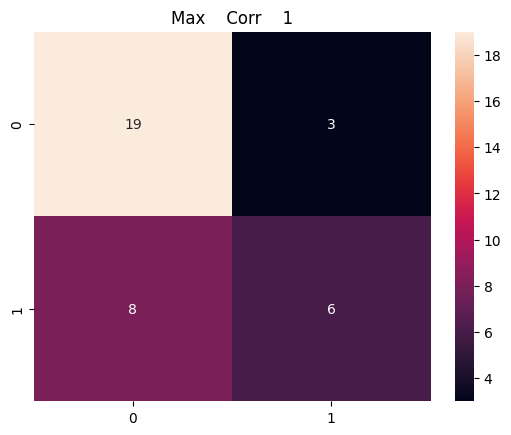

In [ ]:
confusion_matrix_max = multilabel_confusion_matrix(testY_max, y_max_predicted)
confusion_matrix_min = multilabel_confusion_matrix(testY_min, y_min_predicted)

sns.heatmap(confusion_matrix_max[0], annot=True, fmt="g")
plt.title("Max    Corr    1", fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

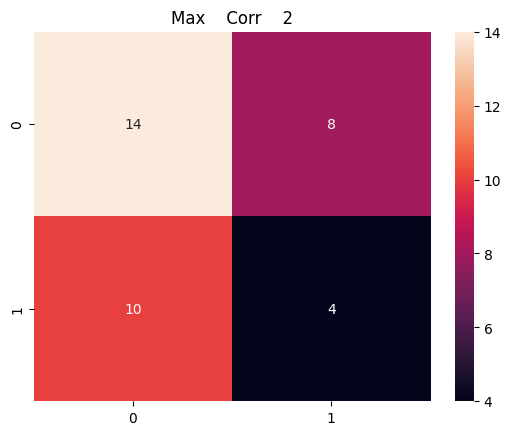

In [ ]:
sns.heatmap(confusion_matrix_max[1], annot=True, fmt="g")
plt.title("Max    Corr    2", fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

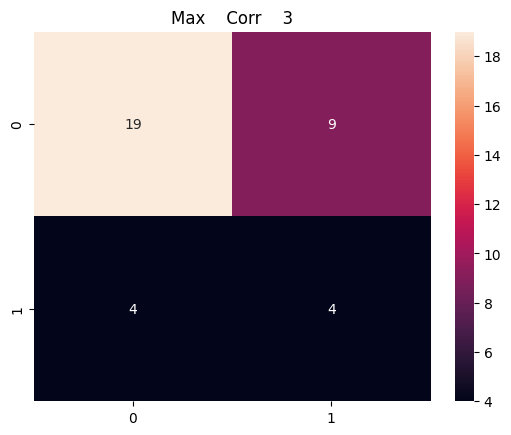

In [ ]:
sns.heatmap(confusion_matrix_max[2], annot=True, fmt="g")
plt.title("Max    Corr    3", fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

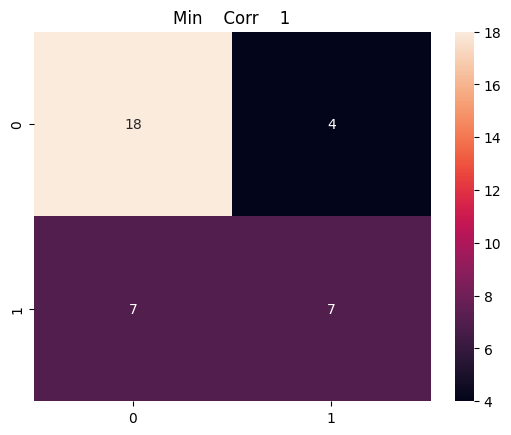

In [ ]:
sns.heatmap(confusion_matrix_min[0], annot=True, fmt="g")
plt.title("Min    Corr    1", fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

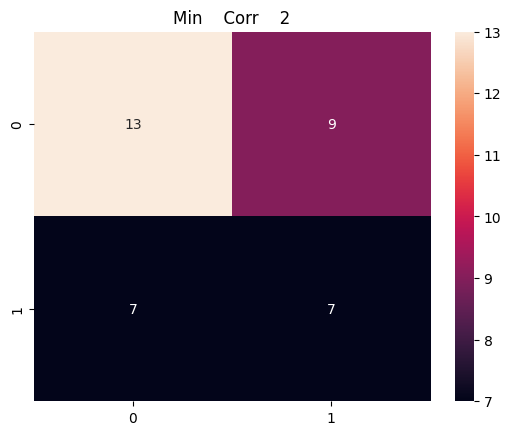

In [ ]:
sns.heatmap(confusion_matrix_min[1], annot=True, fmt="g")
plt.title("Min    Corr    2", fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

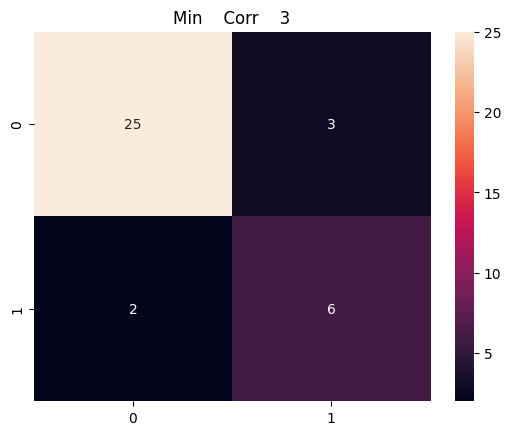

In [ ]:
sns.heatmap(confusion_matrix_min[2], annot=True, fmt="g")
plt.title("Min    Corr    3", fontsize=12)
plt.show

6.	Обучить на выбор (SVM, XGboost,RandomForest), на всех признаках. Получить результат, отобразить метрики как в пункте 5, в случае обучения методов использующих деревья отразить важность признаков

In [ ]:
X=df.drop(["index"], axis=1)
trainX, testX, trainY, testY=train_test_split(X,Y,test_size=0.2, random_state=42)

clf_1=svm.SVC(kernel= "linear", probability=True)
clf_1.fit(trainX, trainY["index_1"])
predictions_svm_1=clf_1.predict(testX)
acc_svm_1=accuracy_score(testY["index_1"], predictions_svm_1)
print (acc_svm_1)
report1=classification_report(testY["index_1"], predictions_svm_1)
print (report1)

clf_2=svm.SVC(kernel= "linear", probability=True)
clf_2.fit(trainX, trainY["index_2"])
predictions_svm_2=clf_2.predict(testX)
acc_svm_2=accuracy_score(testY["index_2"], predictions_svm_2)
print (acc_svm_2)
report2=classification_report(testY["index_2"], predictions_svm_2)
print (report2)

clf_3=svm.SVC(kernel= "linear", probability=True)
clf_3.fit(trainX, trainY["index_3"])
predictions_svm_3=clf_3.predict(testX)
acc_svm_3=accuracy_score(testY["index_3"], predictions_svm_3)
print (acc_svm_3)
report3=classification_report(testY["index_3"], predictions_svm_3)
print (report3)


0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

0.8888888888888888
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.92      0.79      0.85        14

    accuracy                           0.89        36
   macro avg       0.90      0.87      0.88        36
weighted avg       0.89      0.89      0.89        36

0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.90      0.96      0.93        36
weighted avg     

7.	Построить график roc curve

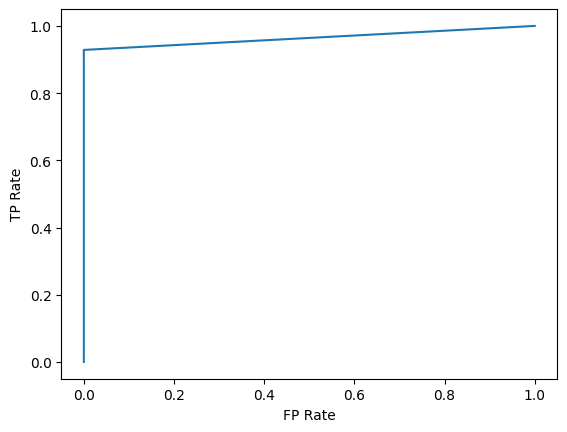

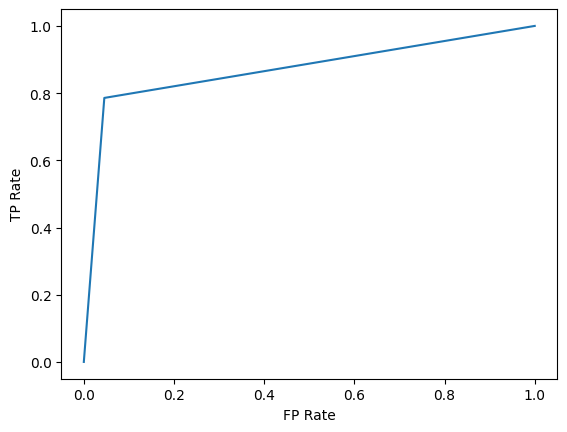

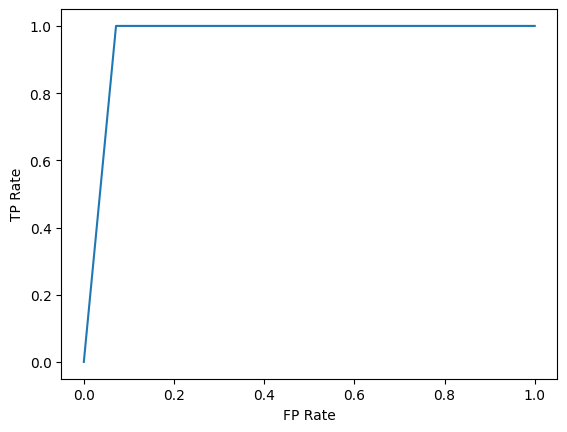

In [ ]:
fpr, tpr, _ = roc_curve(testY["index_1"], predictions_svm_1)
plt.plot(fpr,tpr)
plt.ylabel("TP Rate")
plt.xlabel("FP Rate")
plt.show()

fpr, tpr, _ = roc_curve(testY["index_2"], predictions_svm_2)
plt.plot(fpr,tpr)
plt.ylabel("TP Rate")
plt.xlabel("FP Rate")
plt.show()

fpr, tpr, _ = roc_curve(testY["index_3"], predictions_svm_3)
plt.plot(fpr,tpr)
plt.ylabel("TP Rate")
plt.xlabel("FP Rate")
plt.show()
